In [1]:
import os
import glob
from tqdm.notebook import tqdm #from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path_1 = "./folder_04"
path_2 = "../folder_05"

In [3]:
os.chdir(path_1)
csv_list = sorted(glob.glob('*.csv'))
#print(len(csv_list), csv_list)

In [4]:
#疾患 読み込み
disease = pd.read_csv('disease.csv', engine='python')
#症状 読み込み
symptom = pd.read_csv('symptom.csv', engine='python')

#処理時間は同じくらい
#import dask.dataframe as dd
#dd.read_csv('disease.csv').compute() 

In [5]:
print("疾患 MajorTopicの確認")
print(disease[disease["Descriptor_MajorTopic"]=="Y"]["Qualifier_MajorTopic"].unique().tolist())
print(disease[disease["Descriptor_MajorTopic"]=="N"]["Qualifier_MajorTopic"].unique().tolist())

print("症状 MajorTopicの確認")
print(symptom[symptom["Descriptor_MajorTopic"]=="Y"]["Qualifier_MajorTopic"].unique().tolist())
print(symptom[symptom["Descriptor_MajorTopic"]=="N"]["Qualifier_MajorTopic"].unique().tolist())

疾患 MajorTopicの確認
[nan, 'N', 'Y']
['Y']
症状 MajorTopicの確認
[nan, 'N', 'Y']
['N', 'Y', nan]


In [6]:
print("疾患", disease["PubDate"].min(), disease["PubDate"].max())
print("症状", symptom["PubDate"].min(), symptom["PubDate"].max())

疾患 1902-03-01 2020-12-01
症状 1940-06-08 2020-11-29


In [7]:
#update版作成
update_disease = disease[ disease["PubDate"]>="1966-01-01" ]
update_symptom = symptom[ symptom["PubDate"]>="1966-01-01" ]
update_disease.to_csv("update_disease.csv", index=False)
update_symptom.to_csv("update_symptom.csv", index=False)

In [9]:
#update版の基礎統計
df_list = ["update_disease", "update_symptom"]
#PMID数, PubDate
for i in df_list:
    print(i,  ":", eval(i)["PMID"].nunique(), eval(i)["PubDate"].min(), eval(i)["PubDate"].max())

update_disease : 12423905 1966-01-01 2020-12-01
update_symptom : 1976200 1966-01-01 2020-11-29


In [10]:
#mesh数 
#Descriptor, Descriptor_UI 同じ数だった

#disease
print("update_disease_MeSH: ", update_disease["Descriptor"].nunique() )
print("update_symptom_MeSH: ", update_symptom["Descriptor"].nunique() )

update_disease_MeSH:  4828
update_symptom_MeSH:  384


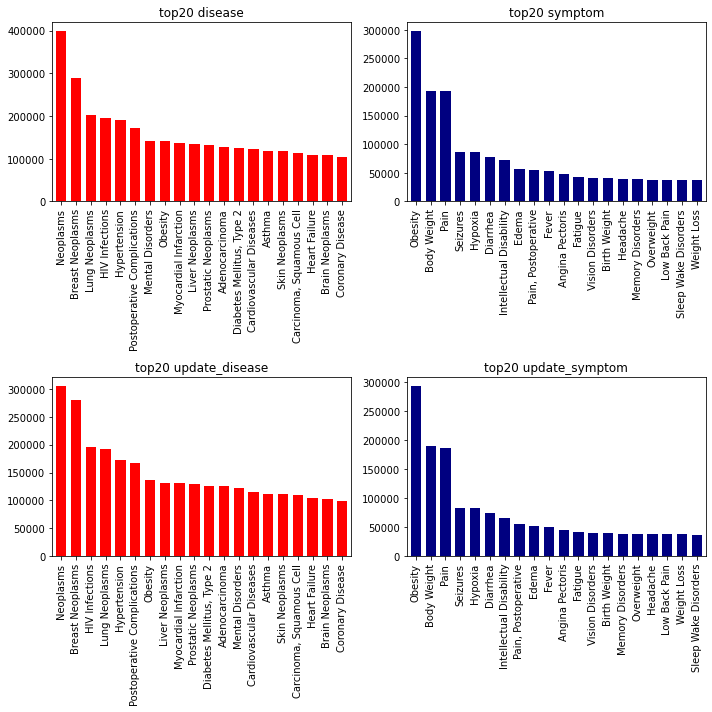

In [11]:
#共起ペアにする前の様子

#疾患メッシュ症状メッシュの出現数top20 

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

color_1 = 'red'
color_2 = 'navy'

#disease, symptom
plt.subplot(221)
disease["Descriptor"].value_counts()[:20].plot.bar(width=0.7, color=color_1, title='top20 disease')#alpha=0.5
plt.subplot(222)
symptom["Descriptor"].value_counts()[:20].plot.bar(width=0.7, color=color_2, title='top20 symptom')

#update_disease, update_symptom
plt.subplot(223)
update_disease["Descriptor"].value_counts()[:20].plot.bar(width=0.7, color=color_1, title='top20 update_disease')#alpha=0.5
plt.subplot(224)
update_symptom["Descriptor"].value_counts()[:20].plot.bar(width=0.7, color=color_2, title='top20 update_symptom')

plt.tight_layout()
plt.show()

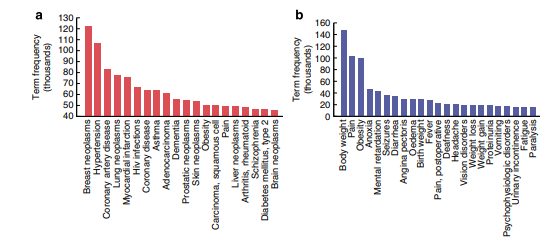

In [12]:
from IPython.display import Image
Image("/home/admin_user/キャプチャbarabasi.PNG")

In [13]:
# update_disease, update_symptom

# disease | symptom 文献数
print(len(sorted(list(set(update_disease["PMID"]) | set(update_symptom["PMID"])))))

# disease & symptom 文献数
print(len(sorted(list(set(update_disease["PMID"]) & set(update_symptom["PMID"])))))


12890258
1509847


In [14]:
update_d = update_disease[["PMID","PubDate","Descriptor"]]
update_s = update_symptom[["PMID","PubDate","Descriptor"]]

update_d = update_d.rename(columns={"Descriptor":"disease"})
update_s = update_s.rename(columns={"Descriptor":"symptom"})

each_ds_pair = pd.merge(update_d, update_s, on=["PMID", "PubDate"])


In [15]:
#save to csv
os.chdir(path_2) 
each_ds_pair.to_csv("each_ds_pair.csv", index=False)

In [16]:
each_ds_pair[:5]

,PMID,PubDate,disease,symptom
0,123,1975-10-01,Duodenal Diseases,Heartburn
1,123,1975-10-01,Gastritis,Heartburn
2,123,1975-10-01,Postoperative Complications,Heartburn
3,127,1975-11-29,Poisoning,Vomiting
4,210,1975-07-01,Acid-Base Imbalance,Hypoxia


In [22]:
print("ペア出現数: ", len(each_ds_pair))
print("ペアの種類数: ", len(each_ds_pair[["disease", 'symptom']].value_counts()))
print("diseaseの種類数: ", each_ds_pair["disease"].nunique())
print("symptomの種類数: ", each_ds_pair["symptom"].nunique())

ペア出現数:  5632191
ペアの種類数:  211838
diseaseの種類数:  4716
symptomの種類数:  384
